# AK4183 Model Risiko II dan Simulasi

### **Tugas 05 - 6 Desember 2022**

Oleh:
* Richard Aldi Susanto NIM. 10819001
* Michelle Aurelia NIM. 10819006
* Farah Alifia Zahra NIM. 10819012
* Jason Hadinata Putra NIM. 10819013
* Keith Huang NIM. 10819032

In [1]:
import pandas as pd
import numpy as np
from scipy import optimize, stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='paper',
              rc={"figure.figsize": [0.5*6.4, 0.5*4.8], 'figure.dpi': 600})

#### 1. Diberikan fungsi peluang dari peubah acak $W$ sebagai

\begin{align*}
    f_{W}(w) = \frac{a}{2b\Gamma(\frac{1}{a})} e^{-|\frac{w-c}{b}|^{a}}
\end{align*}

dengan $w \in \mathbb{R}$; $a, b \in \mathbb{R}^{+}$ dan $c \in \mathbb{R}$.

##### (a) Dapatkan bentuk analitik dari $F_W(w)$.

Berdasarkan definisi,

\begin{align*}
F_W(w) &= \int_{-\infty}^{w}f_W(w)dw = \int_{-∞}^{w} \frac{a}{2b\Gamma(\frac{1}{a})}e^{-|\frac{w-c}{b}|^a}dw.
\end{align*}

Untuk $w < c$,
\begin{align*}
    F_W(w) &= \int_{-∞}^{w} \frac{a}{2b\Gamma(\frac{1}{a})}e^{-\left(-\frac{w-c}{b}\right)^a}dw. 
\end{align*}

Misalkan $ u = (-\frac{w-c}{b})^a  \implies du = -\frac{a}{b}\left(-\frac{w-c}{b}\right)^{a-1}dw \iff -\frac{b}{a}u^{\frac{1}{a}-1}du = dw$, sehingga

\begin{align*}
    F_W(w) &= -\frac{1}{2\Gamma(\frac{1}{a})}\int_{\infty}^{\left(\frac{c-w}{b}\right)^a}u^{\frac{1}{a}-1} e^{-u}du \\ 
    &= \frac{1}{2\Gamma(\frac{1}{a})}\int_{\left(\frac{c-w}{b}\right)^a}^{\infty}u^{\frac{1}{a}-1} e^{-u}du \\
    &= \frac{\Gamma(\frac{1}{a},\left(\frac{c-w}{b}\right)^a)}{2\Gamma(\frac{1}{a})}.
\end{align*}

Untuk $w \geq c$,
\begin{align*}
    F_W(w) &= \int_{-∞}^{c} \frac{a}{2b\Gamma(\frac{1}{a})}e^{-\left(-\frac{w-c}{b}\right)^a}dw + \int_{c}^{w} \frac{a}{2b\Gamma(\frac{1}{a})}e^{-\left(\frac{w-c}{b}\right)^a}dw. 
\end{align*}

Misalkan $ v = (\frac{w-c}{b})^a \implies  dv = \frac{a}{b}\left(\frac{w-c}{b}\right)^{a-1}dw \iff \frac{b}{a}v^{\frac{1}{a}-1}dv = dw$ sehingga

\begin{align*}
    F_W(w) &= \frac{1}{2\Gamma(\frac{1}{a})}\left[\int_{0}^{∞}u^{\frac{1}{a}-1} e^{-u}du + \int_{0}^{\left(\frac{w-c}{b}\right)^a}v^{\frac{1}{a}-1} e^{-v}dv\right]  \\
    &= \frac{1}{2\Gamma(\frac{1}{a})}\left[\int_{0}^{∞}u^{\frac{1}{a}-1} e^{-u}du + \left( \int_{0}^{\infty}v^{\frac{1}{a}-1} e^{-v}dv - \int_{\left(\frac{w-c}{b}\right)^a}^{\infty}v^{\frac{1}{a}-1} e^{-v}dv\right)\right]  \\
    &= 1 - \frac{\Gamma(\frac{1}{a},\left(\frac{w-c}{b}\right)^a)}{2\Gamma(\frac{1}{a})}. 
\end{align*}

Jadi, fungsi distribusi dari $W$ adalah
\begin{align*}
    F_W(w) = \left\{
    \begin{array}{cl}
    \frac{\Gamma(\frac{1}{a},\left(\frac{c-w}{b}\right)^a)}{2\Gamma(\frac{1}{a})} & ,w < c \\
    1 - \frac{\Gamma(\frac{1}{a},\left(\frac{w-c}{b}\right)^a)}{2\Gamma(\frac{1}{a})} & ,w\geq c
    \end{array}
    \right.
\end{align*}
dengan $$\Gamma\left(\frac{1}{a},\left(\frac{w-c}{b}\right)^a\right) = \int_{\left(\frac{w-c}{b}\right)^a}^{\infty}v^{\frac{1}{a}-1} e^{-v}dv$$ adalah *upper incomplete gamma function*.

##### (b) Hitung mean dan variansi dari $W$

Berdasarkan definisi, mean dari $W$ adalah
\begin{align*}
    E[W] &= \int_{-∞}^{∞}w \space \frac{a}{2b\Gamma(\frac{1}{a})}e^{-|\frac{w-c}{b}|^a}dw\\
    &= \int_{-∞}^{c} w\frac{a}{2b\Gamma(\frac{1}{a})}e^{-\left(-\frac{w-c}{b}\right)^a}dw + \int_{c}^{∞} w\frac{a}{2b\Gamma(\frac{1}{a})}e^{-\left(\frac{w-c}{b}\right)^a}dw.
\end{align*}

Misalkan $u = (-\frac{w-c}{b})^a$   dan $ v = (\frac{w-c}{b})^a$.

\begin{align*}
    E[W]&= \int_{0}^{∞} \frac{c-bu^{\frac{1}{a}}}{2\Gamma(\frac{1}{a})}u^{\frac{1}{a}-1}e^{-u}du + \int_{0}^{∞} \frac{c+bv^{\frac{1}{a}}}{2\Gamma(\frac{1}{a})}v^{\frac{1}{a}-1}e^{-v}dv \\
    &= \left(\int_{0}^{∞} \frac{c}{2\Gamma(\frac{1}{a})}u^{\frac{1}{a}-1}e^{-u}du +\int_{0}^{∞} \frac{-b}{2\Gamma(\frac{1}{a})}u^{\frac{2}{a}-1}e^{-u}du \right) \\ &+ \left(\int_{0}^{∞} \frac{c}{2\Gamma(\frac{1}{a})}v^{\frac{1}{a}-1}e^{-v}dv +\int_{0}^{∞} \frac{b}{2\Gamma(\frac{1}{a})}v^{\frac{2}{a}-1}e^{-u}dv \right) \\
    &= \left(\frac{c}{2} - \frac{b \space \Gamma(\frac{2}{a})}{2\Gamma(\frac{1}{a})}\right) + \left(\frac{c}{2} + \frac{b \space \Gamma(\frac{2}{a})}{2\Gamma(\frac{1}{a})}\right) \\
    E[W] &= c.
\end{align*}

Untuk menentukan variansi dari $W$, akan dicari momen kedua dari $W$. Menurut definisi,

\begin{align*}
    E[W^2] &=  \int_{-∞}^{∞}w^2 \space \frac{a}{2b\Gamma(\frac{1}{a})}e^{-|\frac{w-c}{b}|^a}dw\\
    &= \int_{-∞}^{c} w^2\frac{a}{2b\Gamma(\frac{1}{a})}e^{-\left(-\frac{w-c}{b}\right)^a}dw + \int_{c}^{∞} w^2\frac{a}{2b\Gamma(\frac{1}{a})}e^{-\left(\frac{w-c}{b}\right)^a}dw.
\end{align*}

Misalkan $u = (-\frac{w-c}{b})^a$   dan $ v = (\frac{w-c}{b})^a$.

\begin{align*}
    E[W^2]&= \int_{0}^{∞} \frac{c^2-2bcu^{\frac{1}{a}}+b^2u^{\frac{2}{a}}}{2\Gamma(\frac{1}{a})}v^{\frac{1}{a}-1}e^{-u}du + \int_{0}^{∞} \frac{c^2+2bcv^{\frac{1}{a}}+b^2u^{\frac{2}{a}}}{2\Gamma(\frac{1}{a})}v^{\frac{1}{a}-1}e^{-v}dv \\
    &= \left(\frac{c^2}{2} - \frac{2bc \space \Gamma(\frac{2}{a})}{2\Gamma(\frac{1}{a})}+ \frac{b^2\space\Gamma(\frac{3}{a})}{2\Gamma(\frac{1}{a})}\right) +  \left(\frac{c^2}{2} + \frac{2bc \space \Gamma(\frac{2}{a})}{2\Gamma(\frac{1}{a})}+ \frac{b^2\space\Gamma(\frac{3}{a})}{2\Gamma(\frac{1}{a})}\right) \\
    E[W^2] &= c^2 + \frac{b^2\space\Gamma(\frac{3}{a})}{\Gamma(\frac{1}{a})}
\end{align*}

Maka, variansi dari $W$ adalah

\begin{align*}
    Var(W) &= E[W^2] - \left(E[W]\right)^2 = \frac{b^2\space\Gamma(\frac{3}{a})}{\Gamma(\frac{1}{a})}.
\end{align*}

##### (c) Misalkan $\boldsymbol{\theta} = (a,b,c).$ Dapatkan persamaan yang harus dievaluasi untuk menaksir $\boldsymbol{\theta}.$

Untuk menaksir parameter, metode yang sering digunakan adalah maximum likelihood. Fungsi likelihood dari $W$ diberikan oleh
\begin{align*}
    \mathcal{L}(\boldsymbol{\theta};\mathbf{x}) = \prod_{i=1}^n \frac{a}{2b\Gamma(\frac{1}{a})}e^{-|\frac{w_i-c}{b}|^a}.
\end{align*}

Fungsi log-likelihood dari $W$ adalah
\begin{align*}
    \mathcal{l}(\boldsymbol{\theta};\mathbf{x}) = n\ln\left({\frac{a}{2b\Gamma(\frac{1}{a})}}\right) -\sum_{i=1}^n \left|\frac{w_i-c}{b}\right|^a.
\end{align*}

Vektor $\hat{\boldsymbol{\theta}}$ yang memaksimumkan fungsi tersebut adalah taksiran bagi $\boldsymbol{\theta}$.

##### (d) Akses data harga suatu aset pada tautan https://bit.ly/2022-modris2-tugas05-dataset01. Misal harga aset dinotasikan sebagai $P_{t}$. Evaluasi proses imbal hasil $W_{t}=\log{(\frac{P_{t}}{P_{t-1}})}$. Asumsikan $W_{t}$ bisa dimodelkan melalui fungsi peluang $f_{W}(w)$. Dapatkan $\hat{\mathbf{\theta}}$ dengan suatu algoritma persamaan yang sudah dikonstruksi pada bagian 1c.

In [2]:
df = (
    pd.read_excel('./Dataset/tugas05-dataset01.xlsx', index_col=0)
    .rename(columns={'Closing Price': 'Pt'})
    .assign(Wt=lambda df: np.log(df['Pt'] / df['Pt'].shift()))
    .dropna()
)

df

,Pt,Wt
Date,,
2019-06-27,2527.497897,0.010939
2019-06-28,2436.419624,-0.036700
2019-06-29,2438.575578,0.000884
2019-06-30,2550.556046,0.044897
2019-07-01,2494.482876,-0.022230
...,...,...
2022-11-07,33040.189982,0.028691
2022-11-08,32699.671130,-0.010360
2022-11-09,32055.089022,-0.019909


Akan digunakan metode Nelder-Mead untuk meminimumkan fungsi negatif log-likelihood. Titik mulai dari iterasi dibantu oleh metode momen yang sudah dicari pada (1b) yaitu $\boldsymbol{\theta}_{0} = \left(1,\sqrt{\frac{\Gamma(\frac{1}{a})}{\Gamma(\frac{3}{a})}\hat{Var(W)}},\hat{E[W]}\right)$.

In [3]:
from scipy.special import gamma

def nllf(theta: np.ndarray, data: pd.Series):
    a, b, c = theta
    n = len(data)
    ll = n*np.log(a / (2*b*gamma(1/a))) - np.sum(np.abs((data-c)/b)**a)
    return -ll

def pdf(wvals: np.ndarray, theta: np.ndarray):
    a, b, c = theta
    return a / (2*b*gamma(1/a)) * np.exp(-np.abs((wvals-c)/b)**a)

In [4]:
BOUNDS = optimize.Bounds(lb=[0,0,-np.inf])

a0 = 1
b0 = np.sqrt(gamma(1/a0) / gamma(3/a0) * df['Wt'].var())
c0 = df['Wt'].mean()
theta0 = np.array([a0, b0, c0])

res = optimize.minimize(nllf, theta0,
                        method='Nelder-Mead',
                        bounds=BOUNDS,
                        args=(df['Wt'],)
                        )

print(f"Sukses: {res.success}")
print(f"Taksiran \N{Mathematical Bold Italic Small Theta}: {res.x}")

Sukses: True
Taksiran 𝜽: [2.9692649  0.04920446 0.00300921]


(e) Selidiki apakah hasil penaksiran parameter sudah baik.

<!-- $a$ -->
Misal $\hat{\theta_{n}}$ adalah taksiran *maximum likelihood* dari $\theta$. Menurut de Jong (2008), penaksiran *maximum likelihood* adalah salah satu metode penaksiran paling baik karena:

<ol>
    <li><i>Invariance</i>: $g(\hat{\theta_{n}})$ menaksir $g(\theta)$ juga secara *maximum likelihood* untuk $g$ suatu fungsi monoton,</li>
    <li>Tak bias asimtotik: $\lim_{n\to\infty}E[\theta_{n}]=\theta$,</li>
    <li>Konsisten: $\theta_{n}$ konvergen secara peluang ke $\theta$,</li>
    <li>Variansi minimum: $\theta_{n}$ memiliki variansi paling kecil di antara jenis penaksir lainnya.</li>
</ol>

Karena penaksiran berhasil dilakukan menggunakan metode ini, penaksir parameter *maximum likelihood* ini dapat dikatakan sudah baik.

Uji Kolmogorov-Smirnov juga bisa digunakan untuk menentukan apakah hasil penaksiran parameter dan pilihan distribusi sudah baik. Apabila $H_{0}$ uji ini ditolak, dapat dikatakan bahwa distribusi hasil fitting dan data berbeda secara signifikan.

In [5]:
from scipy.special import gammaincc

def cdf(wvals: np.ndarray, theta: np.ndarray):
    a, b, c = theta
    
    cdf = gammaincc(1/a, np.abs((wvals-c)/b)**a) / 2
    cdf[wvals > c] = 1 - cdf[wvals > c]
    return cdf

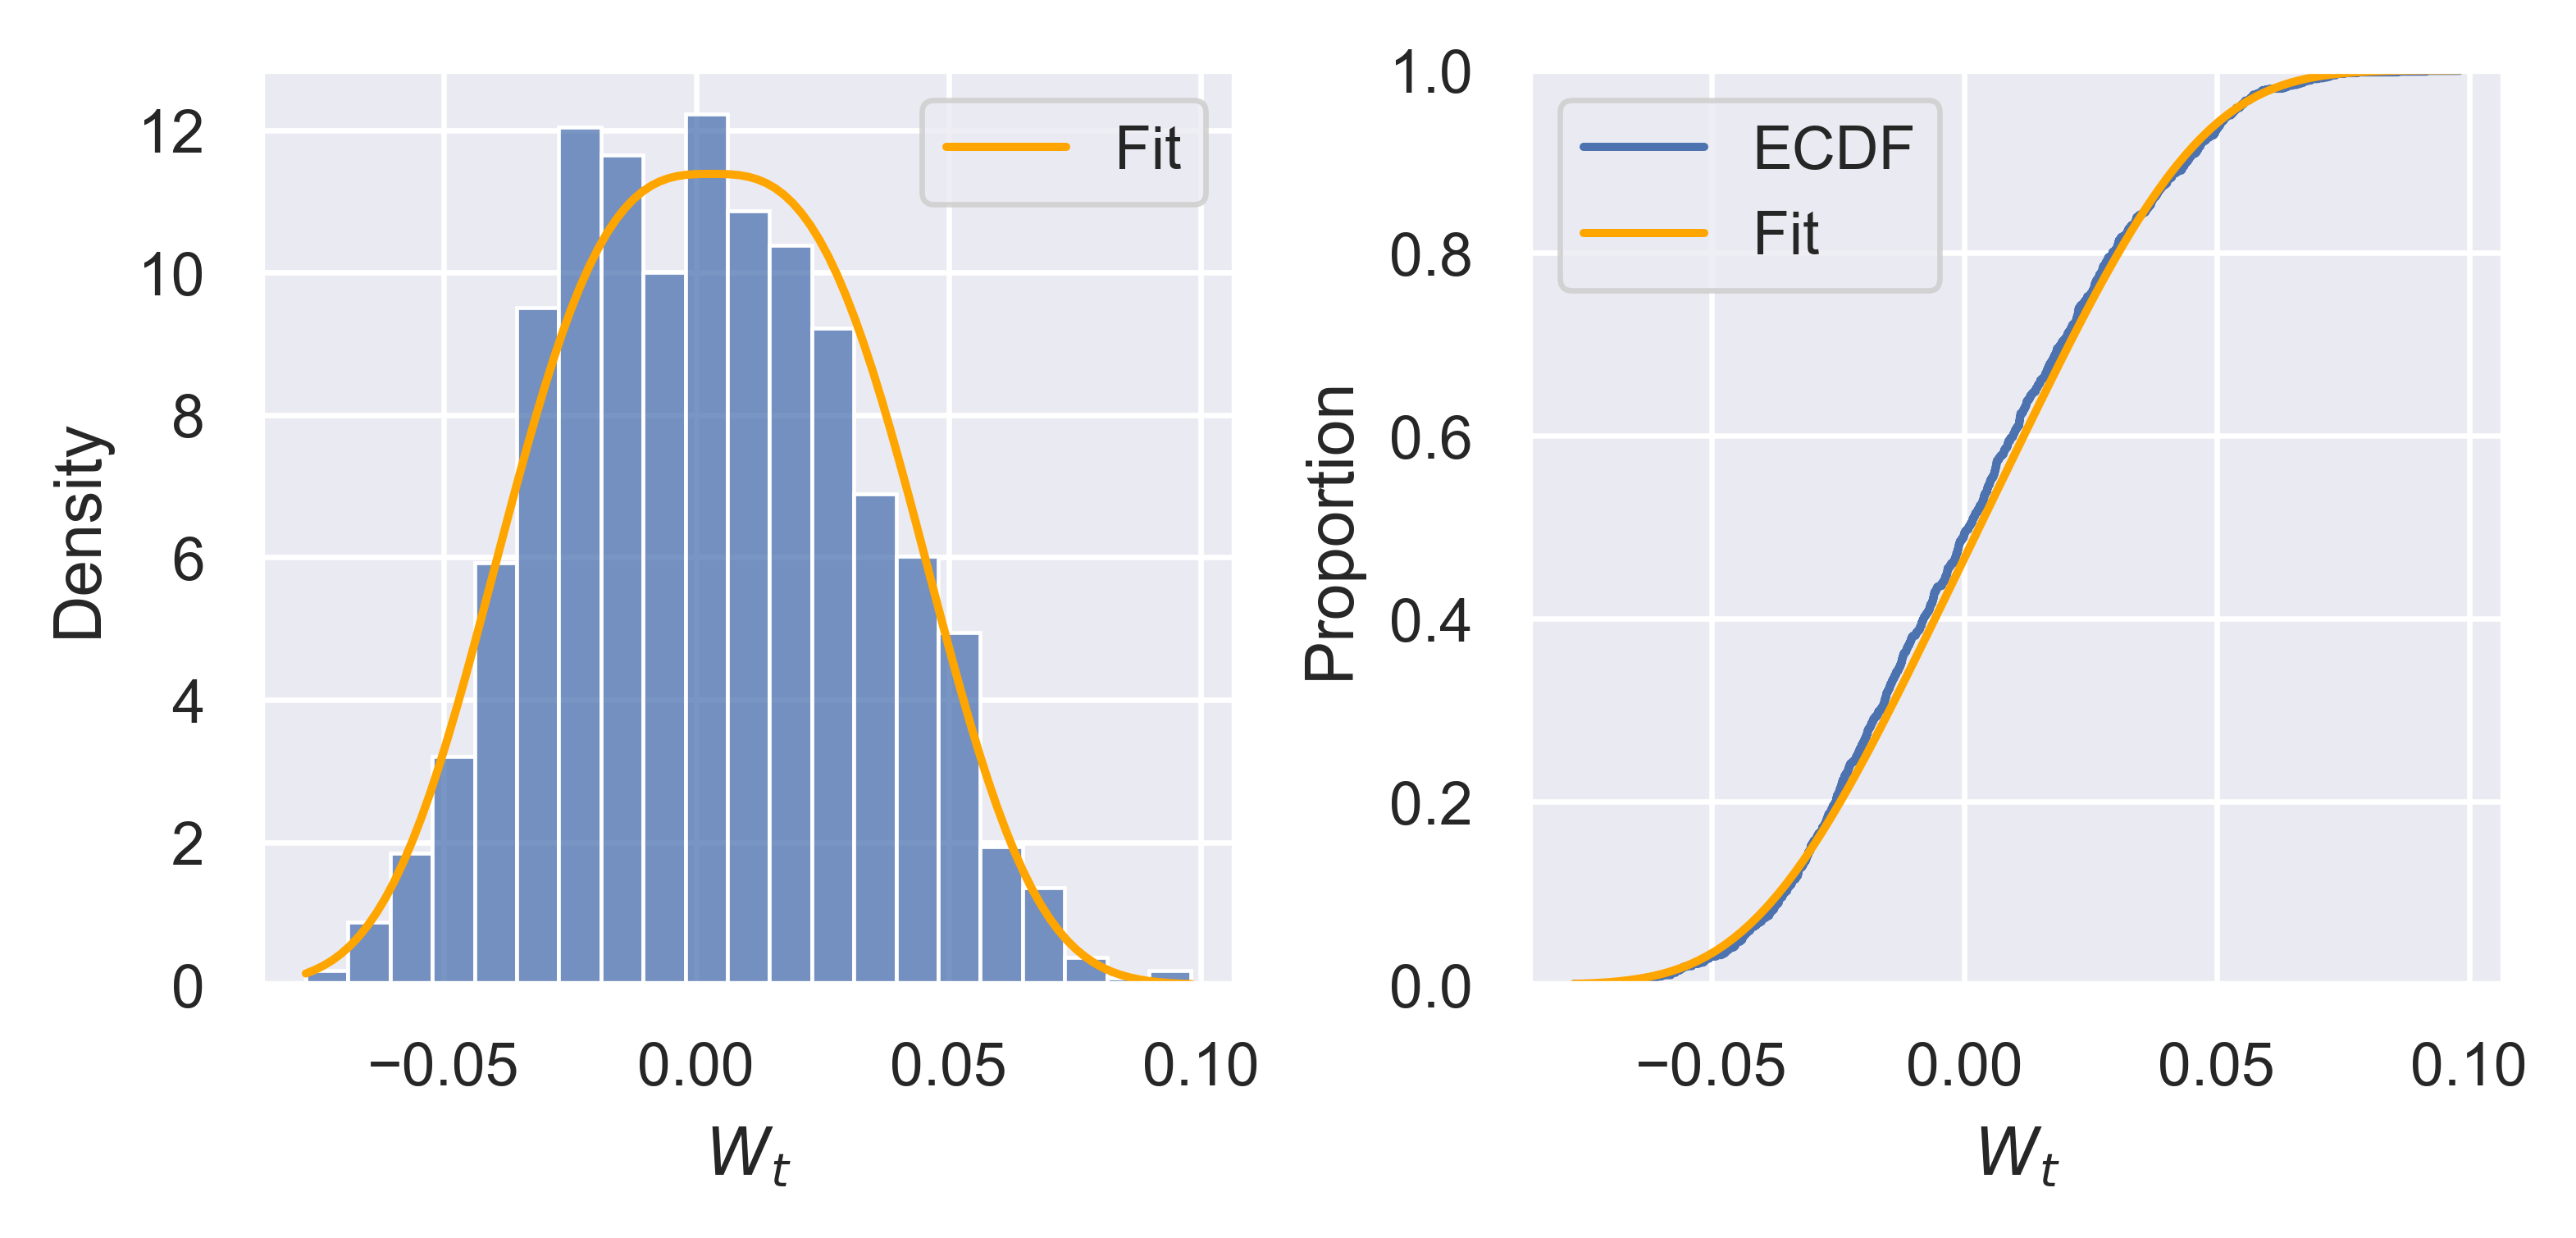

In [6]:
fig, axs = plt.subplots(1, 2, layout='constrained', figsize=[0.8*6.4, 0.5*4.8])

sns.histplot(data=df, x='Wt', stat='density', ax=axs[0])
w = np.linspace(df['Wt'].min(), df['Wt'].max(), 101, endpoint=True)
axs[0].plot(w, pdf(w, res.x), color='orange', label='Fit')
axs[0].set(xlabel='$W_{t}$')
axs[0].legend()

sns.ecdfplot(df['Wt'], label='ECDF', ax=axs[1])
axs[1].plot(w, cdf(w, res.x), color='orange', label='Fit')
axs[1].set(xlabel='$W_{t}$')
axs[1].legend()

plt.show()

In [7]:
print(stats.kstest(df['Wt'], cdf, args=(res.x,)))

KstestResult(statistic=0.03300094216453631, pvalue=0.13303760402023002)


Karena $H_0$ tidak ditolak pada taraf signifikansi $\alpha=0.05$, distribusi dari model tidak berbeda signifikan dengan data dan hasil taksiran sudah baik.

Untuk taraf signifikansi $\alpha=5\%$, $H_{0}$ tidak ditolak sehingga distribusi hasil fitting tidak berbeda signifikan dengan data.

#### 2. Tinjau dataset nilai kerugian dalam juta rupiah yang bisa diakses di https://bit.ly/2022-modris2-tugas05-dataset02.

#####  (a) Definisikan notasi yang relevan untuk membuat tabel himpunan risiko kemudian konstruksi dengan notasi yang sudah didefinisikan.

<!-- $a$ -->
Notasi yang digunakan untuk membuat tabel himpunan risiko adalah sebagai berikut. Notasi ini diambil dari Nonlife Actuarial *Models Theory, Methods and Evaluations* bab 10 (Tse, 2009).

<table>
    <tr>
        <th style="text-align:center">Atribut</th>
        <th style="text-align:center">Definisi</th>
        <th style="text-align:center">Formula</th>
    </tr>
    <tr>
        <td>$$j$$</td>
        <td style="text-align:left">Indeks yang merupakan bilangan asli dari observasi unik/berbeda yang diurutkan.</td>
        <td>$$j, ~j \in \{1,2,\ldots,m\}$$</td>
    </tr>
    <tr>
        <td>$$y_{j}$$</td>
        <td style="text-align:left">Observasi unik/berbeda sebanyak $m$ dari seluruh observasi $\mathbf{x}=(x_{i})_{i=1}^{n}$ yang diurutkan.</td>
        <td>
            $$0 < y_{1} < y_{2} < \ldots < y_{m}, ~m \leq n,$$
            $$y_{j} \in \{x_{i}\}_{i=1}^{n}, ~j \in \{1,2,\ldots,m\}$$
        </td>
    </tr>
    <tr>
        <td>$$w_{j}$$</td>
        <td style="text-align:left">Frekuensi $y_{j}$ muncul di observasi $\mathbf{x}=(x_{i})_{i=1}^{n}$.</td>
        <td>$$w_{j} = \sum_{i=1}^{n} I_{\{y_{j}\}}(x_{i})$$</td>
    </tr>
    <tr>
        <td>$$r_{j}$$</td>
        <td style="text-align:left">Himpunan risiko pada waktu $y_{j}$, banyaknya observasi yang terpapar risiko kematian/kegagalan pada waktu $y_{j}$.</td>
        <td>$$r_{j}=\sum_{i=j}^{m}{w_{i}}$$</td>
    </tr>
</table>

In [8]:
def construct_risk_set(xi: pd.Series) -> pd.DataFrame:
    """Construct a risk set given a complete data of time-to-failures.

    Args:
        xi (pd.Series): Data of time-to-failure

    Returns:
        pd.DataFrame: Risk set from xi
    """
    # 1. Count occurence of each unique value (yj) as wj
    wj = (
        xi.value_counts()
        .sort_index(ascending=False)
    )
    # 2. Count rj from cumsum of wj
    rj = wj.cumsum()

    # 3. Concatenating and tidying up
    df_risk_set = (
        pd.concat([wj,rj], axis=1)
        .sort_index()
        .reset_index()
        .set_axis(['yj','wj','rj'], axis=1)  # Set label directly
        .rename(index=lambda idx: idx+1)  # Rename label based on mapper
        .rename_axis(index='j')  # Rename the axis, not label
    )
    
    return df_risk_set

In [9]:
xi1 = (
    pd.read_excel('./Dataset/tugas05-dataset02.xlsx', header=None)
    .squeeze('columns')
    .rename('xi')
)

df_risk_set1 = construct_risk_set(xi1)
df_risk_set1

,yj,wj,rj
j,,,
1,11,125,6786
2,12,172,6661
3,13,172,6489
4,14,187,6317
5,15,217,6130
...,...,...,...
75,85,11,58
76,86,13,47
77,87,13,34


##### (b) Misal diterapkan modifikasi cakupan polis berupa deductible 50 kemudian faktor coinsurance 90% dan dibulatkan ke bawah. Konstruksi tabel himpunan risiko baru dari hasil modifikasi cakupan polis. 

In [10]:
DEDUCTIBLE = 50
COINSURANCE_FACTOR = 0.9

xi2 = (
    np.floor(COINSURANCE_FACTOR * (xi1 - DEDUCTIBLE)).clip(lower=0)
    .astype('int')
    .rename('xi')
)

df_risk_set2 = construct_risk_set(xi2)
df_risk_set2

,yj,wj,rj
j,,,
1,0,5682,6786
2,1,48,1104
3,2,42,1056
4,3,73,1014
5,4,38,941
6,5,49,903
7,6,42,854
8,7,32,812
9,8,47,780


##### (c) Misal tabel himpunan risiko pada (2a) disebut Tabel I dan (2b) disebut Tabel II. Visualisasikan fungsi distribusi empiris dari Tabel I dan Tabel II. Berikan analisis perbandingan.

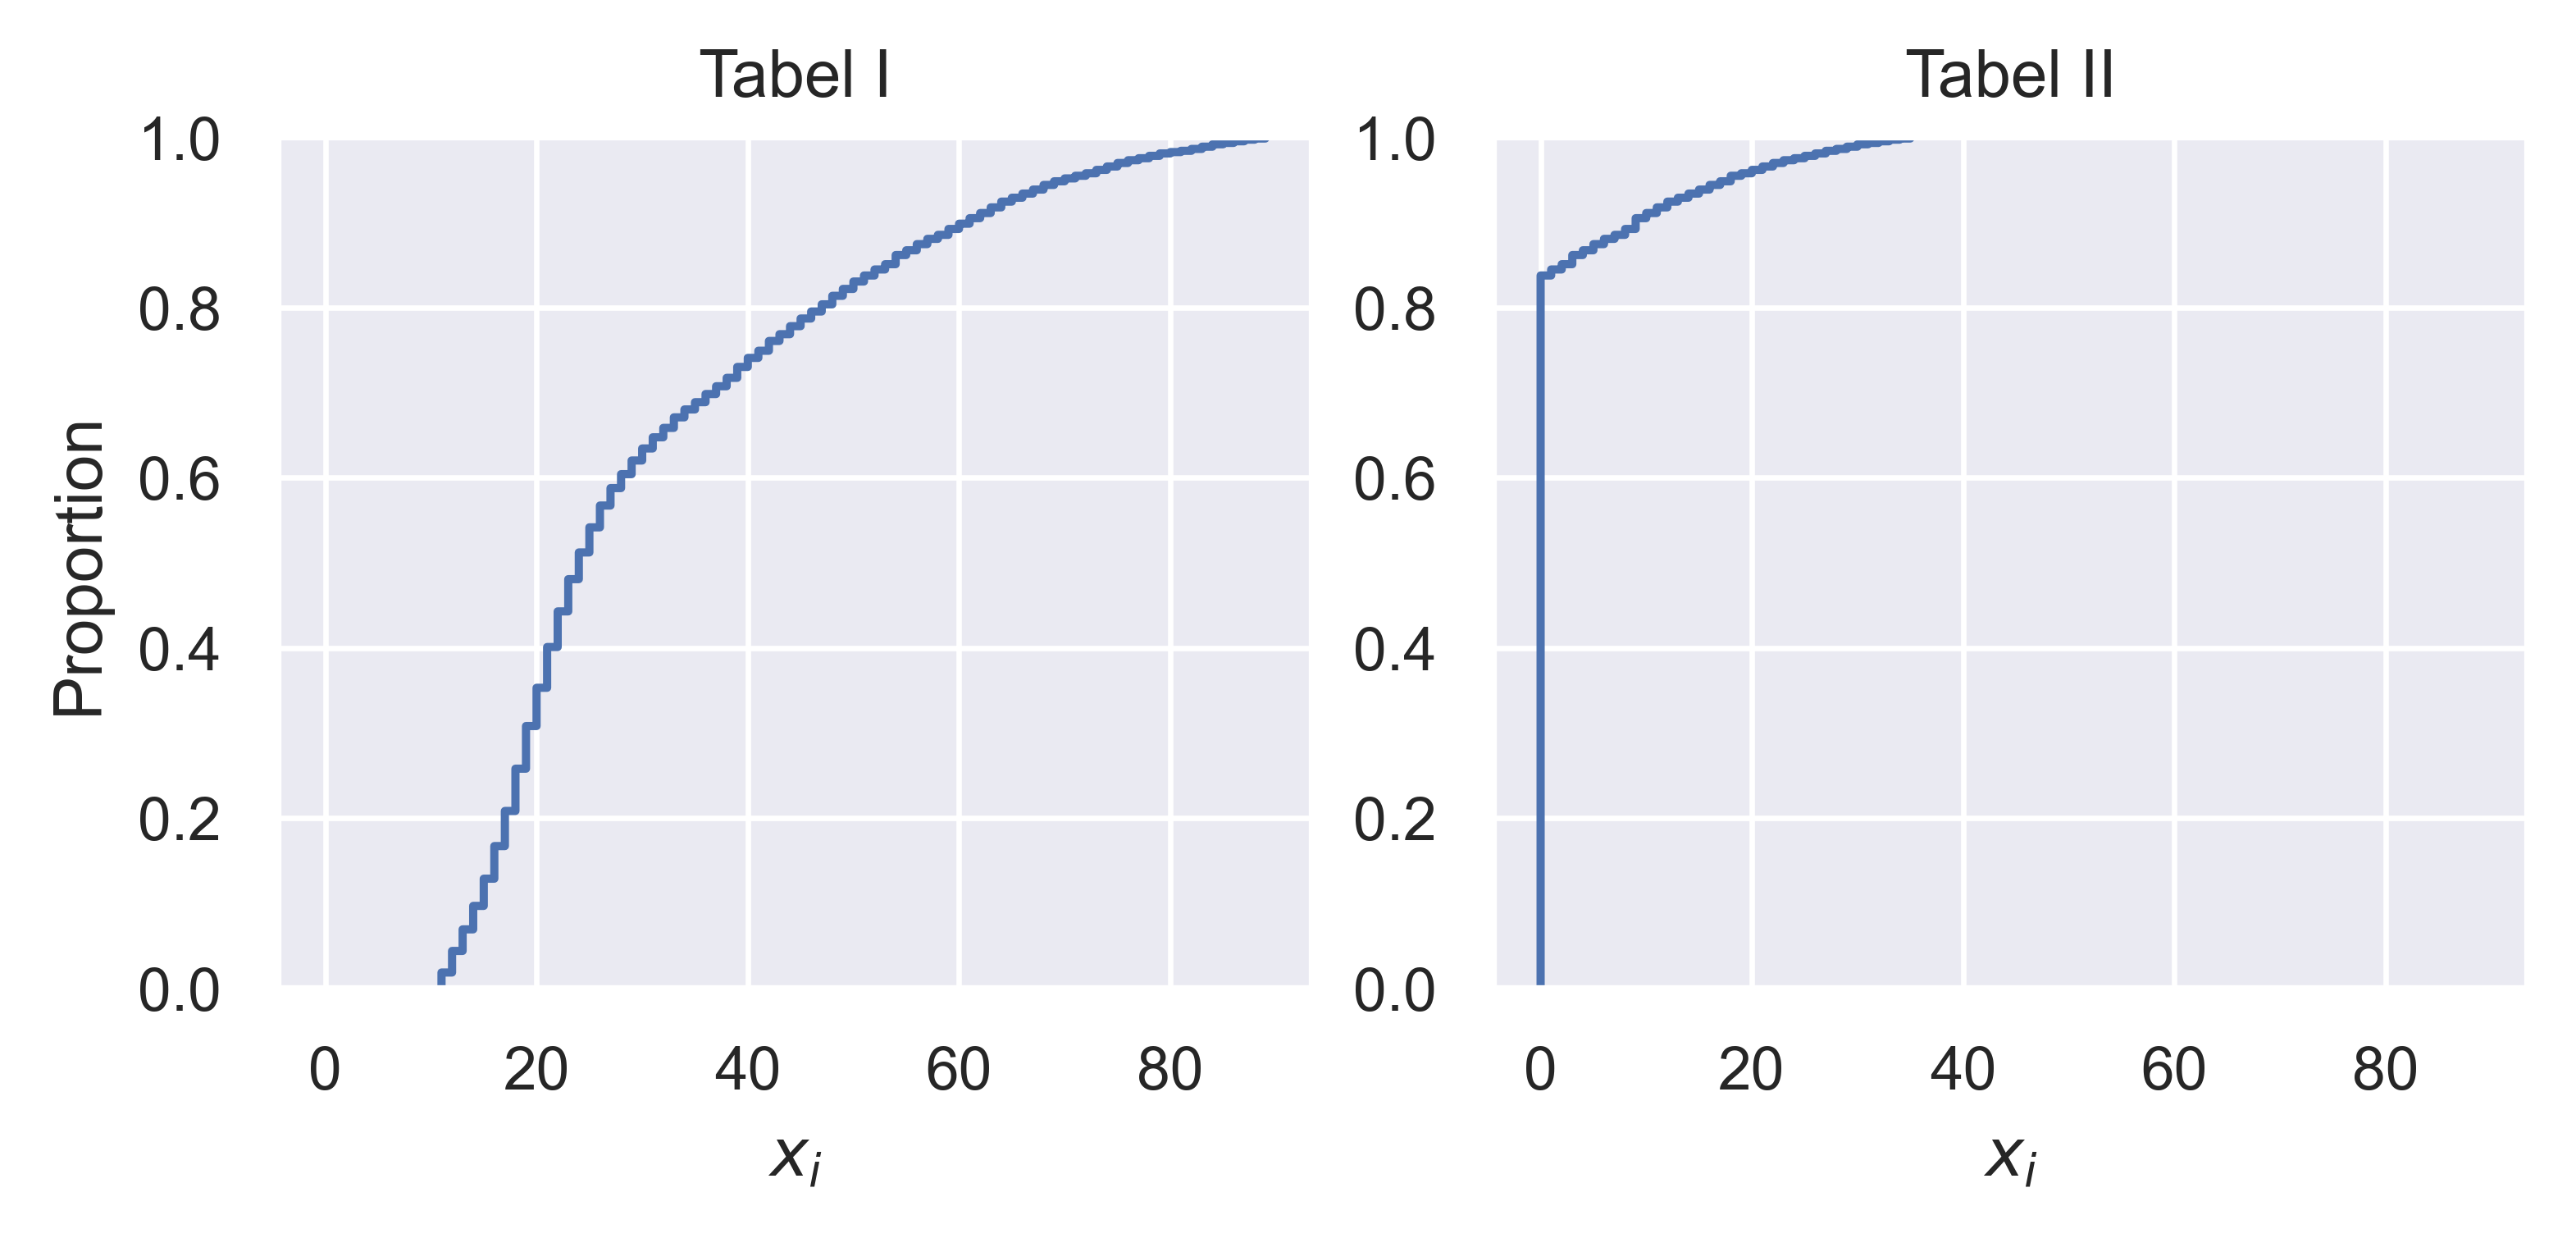

In [11]:
fig, axs = plt.subplots(1, 2,
                        sharex=True,
                        layout='constrained',
                        figsize=[0.8*6.4, 0.5*4.8])

sns.ecdfplot(xi1, ax=axs[0])
axs[0].set(title='Tabel I', xlabel='$x_{i}$')

sns.ecdfplot(xi2, ax=axs[1])
axs[1].set(title='Tabel II', xlabel='$x_{i}$', ylabel='')

plt.show()

Perhatikan bahwa, himpunan risiko **Tabel II** merupakan himpunan risiko **Tabel I** yang telah dikenakan modifikasi cakupan polis yaitu *deductible* sebesar $50$ dan kemudian dikenakan faktor *coinsurance* sebesar 90% dan dibulatkan ke bawah. Hal ini mengimplikasikan bahwa nilai $y_j$ dari **Tabel I** yang bernilai lebih kecil dari 50 akan bernilai 0 (tidak ada pembayaran klaim) sementara nilai $y_j$ yang lebih besar dari $50$ akan dikurangi oleh 50 sebelum nantinya semua nilai yang telah dimodifikasi tersebut dikalikan dengan 90% dan dibulatkan ke bawah. 

Karena banyaknya data yang memiliki nilai $y_j$ di bawah 50 pada **Tabel I**, didapati nilai 0 yang banyak untuk nilai $y_j$ baru pada **Tabel II**. Hal ini tercerminkan pada visualisasi fungsi distribusi empiris **Tabel II**, yang mana grafik fungsi distribusi langsung naik curam di 0 dan dilanjutkan kenaikan yang landai setelahnya. Didapati pula grafik fungsi distribusi akan menyentuh nilai 1 pada $y_j=35$. Hal ini terjadi karena nilai maksimal $y_j$ pada **Tabel I** adalah $89$ sehingga $0.9(89-50)=35.1$ dan jika dibulatkan ke bawah akan didapati nilai 35. 

##### (d) Hitung Value-at-Risk melalui kuantil empiris pada tingkat kepercayaan 90%, 95%, dan 99% dengan basis Tabel I dan Tabel II. Buatlah kesimpulan mengenai hasil tersebut.

Menurut Tse (2009), Value-at-Risk didefinisikan sebagai

\begin{align*}
  VaR_{\delta}(X)=\inf\{x \in [0,\infty\rangle : F_{X}(x) \geq \delta\}.
\end{align*}

Kerugian acak dianggap berdistribusi diskret dan mengikuti distribusi empirisnya yang didapat dari himpunan risiko yang bersesuaian.

In [12]:
def calculate_VaR(alpha: float, df_risk_set: pd.DataFrame) -> float:
    """Calculate Value-at-Risk given confidence level and the risk set.

    Args:
        alpha (float): Confidence level, must be float between 0 and 1
        df_risk_set (pd.DataFrame): Complete risk set with notations
                                    as described in Tse (2009)

    Returns:
        float: Associated Value-at-Risk
    """
    gj = df_risk_set['wj'].cumsum()
    n = gj.iloc[-1]
    Fj = gj / n

    # Get the infimum
    yj = df_risk_set.loc[Fj >= alpha, 'yj']
    VaR = yj.min()
    
    return VaR

In [13]:
ALPHAS = [0.90, 0.95, 0.99]

pd.DataFrame({
    'VaR Tabel I': [calculate_VaR(alpha, df_risk_set1) for alpha in ALPHAS],
    'VaR Tabel II': [calculate_VaR(alpha, df_risk_set2) for alpha in ALPHAS],
}, index=pd.Index(ALPHAS, name='\N{Mathematical Italic Small Alpha}'))

,VaR Tabel I,VaR Tabel II
𝛼,,
0.90,61,9
0.95,70,18
0.99,84,30


Dari perhitungan diatas, didapati bahwa nilai *Value at Risk* dari **Tabel II** memiliki nilai yang jauh lebih kecil jika dibandingkan dengan nilai *Value at Risk* dari **Tabel I**. Hal ini disebabkan karena nilai kerugian ($y_j$) pada **Tabel II** yang telah dikenakan modifikasi cakupan polis *deductible* dan *coinsurance*, sehingga membuat nilai kerugian yang harus dibayarkan oleh perusahaan asuransi menjadi semakin kecil.

##### (e) Konstruksikan algoritma untuk memperoleh penaksir fungsi kesintasan Kaplan-Meier kemudian hitung $\hat{S}(40)$ dengan basis Tabel II.

Perhatikan bahwa penaksir fungsi kesintasan Kaplan-Meier didefinisikan sebagai berikut:

\begin{align*}
    \hat{S}_{K}(y) = \left\{
    \begin{array}{ccl}
    1, & 0 < y < y_1\\
    \prod\limits_{h = 1}^{j} \Big(1 - \dfrac{w_h}{r_h} \Big) & y_j \leq y < y_{j+1}, j = 1,..., n-1 \\
    \prod\limits_{h = 1}^{n} \Big(1 - \dfrac{w_h}{r_h} \Big) & y_{n} \leq y.
    \end{array}
    \right.
\end{align*}

Algoritma untuk memperoleh penaksir fungsi kesintasan Kaplan-Meier adalah:

Masukan: $\mathbf{x}$
1. Urutkan nilai $\mathbf{x}$ dari yang terkecil hingga nilai terbesar.
2. Cari nilai-nilai observasi yang berbeda dari $\mathbf{x}$. Simpan nilai observasi tersebut pada variabel $y_{j}$ dengan $j=1,2,3,...,m$ dan $y_{i} \lt y_{j}$ untuk setiap $i \lt j$.
3. Hitung banyaknya nilai observasi di $\mathbf{x}$ yang sama dengan $y_{j}$. Simpan nilai tersebut pada variabel $w_{j}$ dengan $j=1,2,3,...,m$.
4. Hitung nilai $r_{j}$ menggunakan formula $r_{j}=r_{j-1}-w_{j-1}$.
5. Taksir penaksir Kaplan-Meier dengan formula yang telah dikontruksikan diatas dan simpan ke dalam array yang berisi penaksir Kaplan-Meier $\hat{S}_K = (\hat{S}_{K}(y_1),...,\hat{S}_{K}(y_m) )$

Luaran: $\hat{S}_K$


In [14]:
def get_S_hat(yvals: np.ndarray, Sy: pd.Series) -> np.ndarray:
    """Get the value of S_hat for a given sample of yvals and Sy

    Args:
        yvals (np.ndarray): Argument for Sy
        Sy (pd.Series): The estimate of survival function, indexed as yj

    Returns:
        np.ndarray: Array of S_hat(yvals)
    """
    res = np.ones_like(yvals, dtype='float')
    yj = Sy.index
    for i, y in enumerate(yvals):
        # Modify if y >= y1, else the value of 1 is correct
        if y >= yj.min():
            imax = yj[yj <= y].max()
            res[i] = Sy[imax]
    return res

In [15]:
SKy = (
    (1 - df_risk_set2['wj'] / df_risk_set2['rj']).cumprod()  # Kaplan-Meier
    .set_axis(pd.Index(df_risk_set2['yj']))
)

print(f"Taksiran Kaplan-Meier S(40): {get_S_hat(np.array([40.0]), SKy)[0]}")

Taksiran Kaplan-Meier S(40): 0.0


##### (f) Tuliskan kegunaan penaksir Nelson-Aalen pada industri asuransi atau keuangan.


Penaksir Nelson-Aalen adalah suatu penaksir non-parametrik yang seringkali digunakan untuk menaksir fungsi laju hazard kumulatif dari suatu data kesintasan yang tersensor. Dalam buku *Encyclopedia of Biostatistics* (Borgan, 2005), penaksir Nelson-Aalen untuk laju hazard kumulatif didefinisikan sebagai berikut:

\begin{align*}
    \hat{H}\left(t\right)=\sum_{t_j\le t}\frac{d_j}{r_j}.
\end{align*}

Taksiran ini memiliki taksiran variansi yang diberikan oleh $\widehat{\sigma^2}\left(t\right)=\sum_{t_j\le t}\frac{\left(r_j-d_j\right)d_j}{\left(r_j-1\right)r_j^2}$. Sementara itu, taksiran fungsi kesintasan Nelson-Aalen diberikan oleh:

\begin{align*}
    \hat{S}_{N}\left(t\right)=\exp\left(-\hat{H}\left(t\right)\right)=\exp\left(-\sum_{t_j\le t}\frac{d_j}{r_j}\right).
\end{align*}

Pada artikel “Credit Risk Assessment Using Survival Analysis for Progressive Right-Censored Data: A Case Study in Jordan” (Noriszura, et al., 2017) dari *Journal of Internet Banking and Commerce*, penaksir Nelson-Aalen digunakan untuk menaksir probabilitas dari gagal bayar. Taksiran ini bertujuan untuk evaluasi performa dari suatu sampel portofolio risiko kredit. Dalam artikel ini, penaksir Nelson-Aalen digunakan dalam pembuatan model non-parametrik. $d_{j}$ didefinisikan sebagai banyaknya gagal bayar pada waktu $t_{j}$ dan $r_{j}$ didefinisikan sebagai banyaknya pinjaman yang berisiko gagal bayar pada waktu $t_{j}$.

#### 3. Asuransi umum di suatu negara mencatat data klaim yang bisa diakses di https://bit.ly/2022-modris2-tugas05-dataset03.

##### (a) Asumsikan tingkat suku bunga efektif 5% per tahun. Sesuaikan nilai-nilai klaim tersebut pada tahun 2022 kemudian tentukan distribusi dari rata-rata severitas tahunan yang belum dan sudah disesuaikan. Jelaskan apakah terdapat perbedaan distribusi.

In [16]:
INTEREST_RATE = 0.05
YEAR_NOW = 2022

df = pd.read_excel('./Dataset/tugas05-dataset03.xlsx', index_col=0)

interest_factor = (1+INTEREST_RATE) ** (YEAR_NOW-df['loss_year'])
df = df.assign(adjusted_total_claim_amount=
               df['total_claim_amount'] * interest_factor)

df

,loss_year,total_claim_amount,adjusted_total_claim_amount
policy_ID,,,
100804,2012,41690,67908.616990
101421,1999,74200,227907.062689
106186,2011,65100,111343.092213
106873,1998,70290,226692.275044
108844,2007,56400,117251.549319
...,...,...,...
992145,2012,6930,11288.239764
993840,2013,68750,106653.814849
994538,1991,71760,325649.714083


Setelah mennyesuaikan data severitas klaim pada tahun 2022, akan dicari distribusi data dengan melihat histogram data severitas klaim (*total claim amount*) dan severitas klaim yang disesuaikan (*adjusted claim amount*).

In [17]:
df_agg = df.groupby('loss_year').agg('mean')
df_agg

,total_claim_amount,adjusted_total_claim_amount
loss_year,,
1990,50175.000000,239080.938187
1991,38998.000000,176974.464183
1992,50258.125000,217212.720133
1993,59570.000000,245198.197417
1994,57132.857143,223968.178049
1995,40391.428571,150799.634368
1996,57950.000000,206051.232266
1997,70153.529412,237564.750945
1998,58786.923077,189593.702306


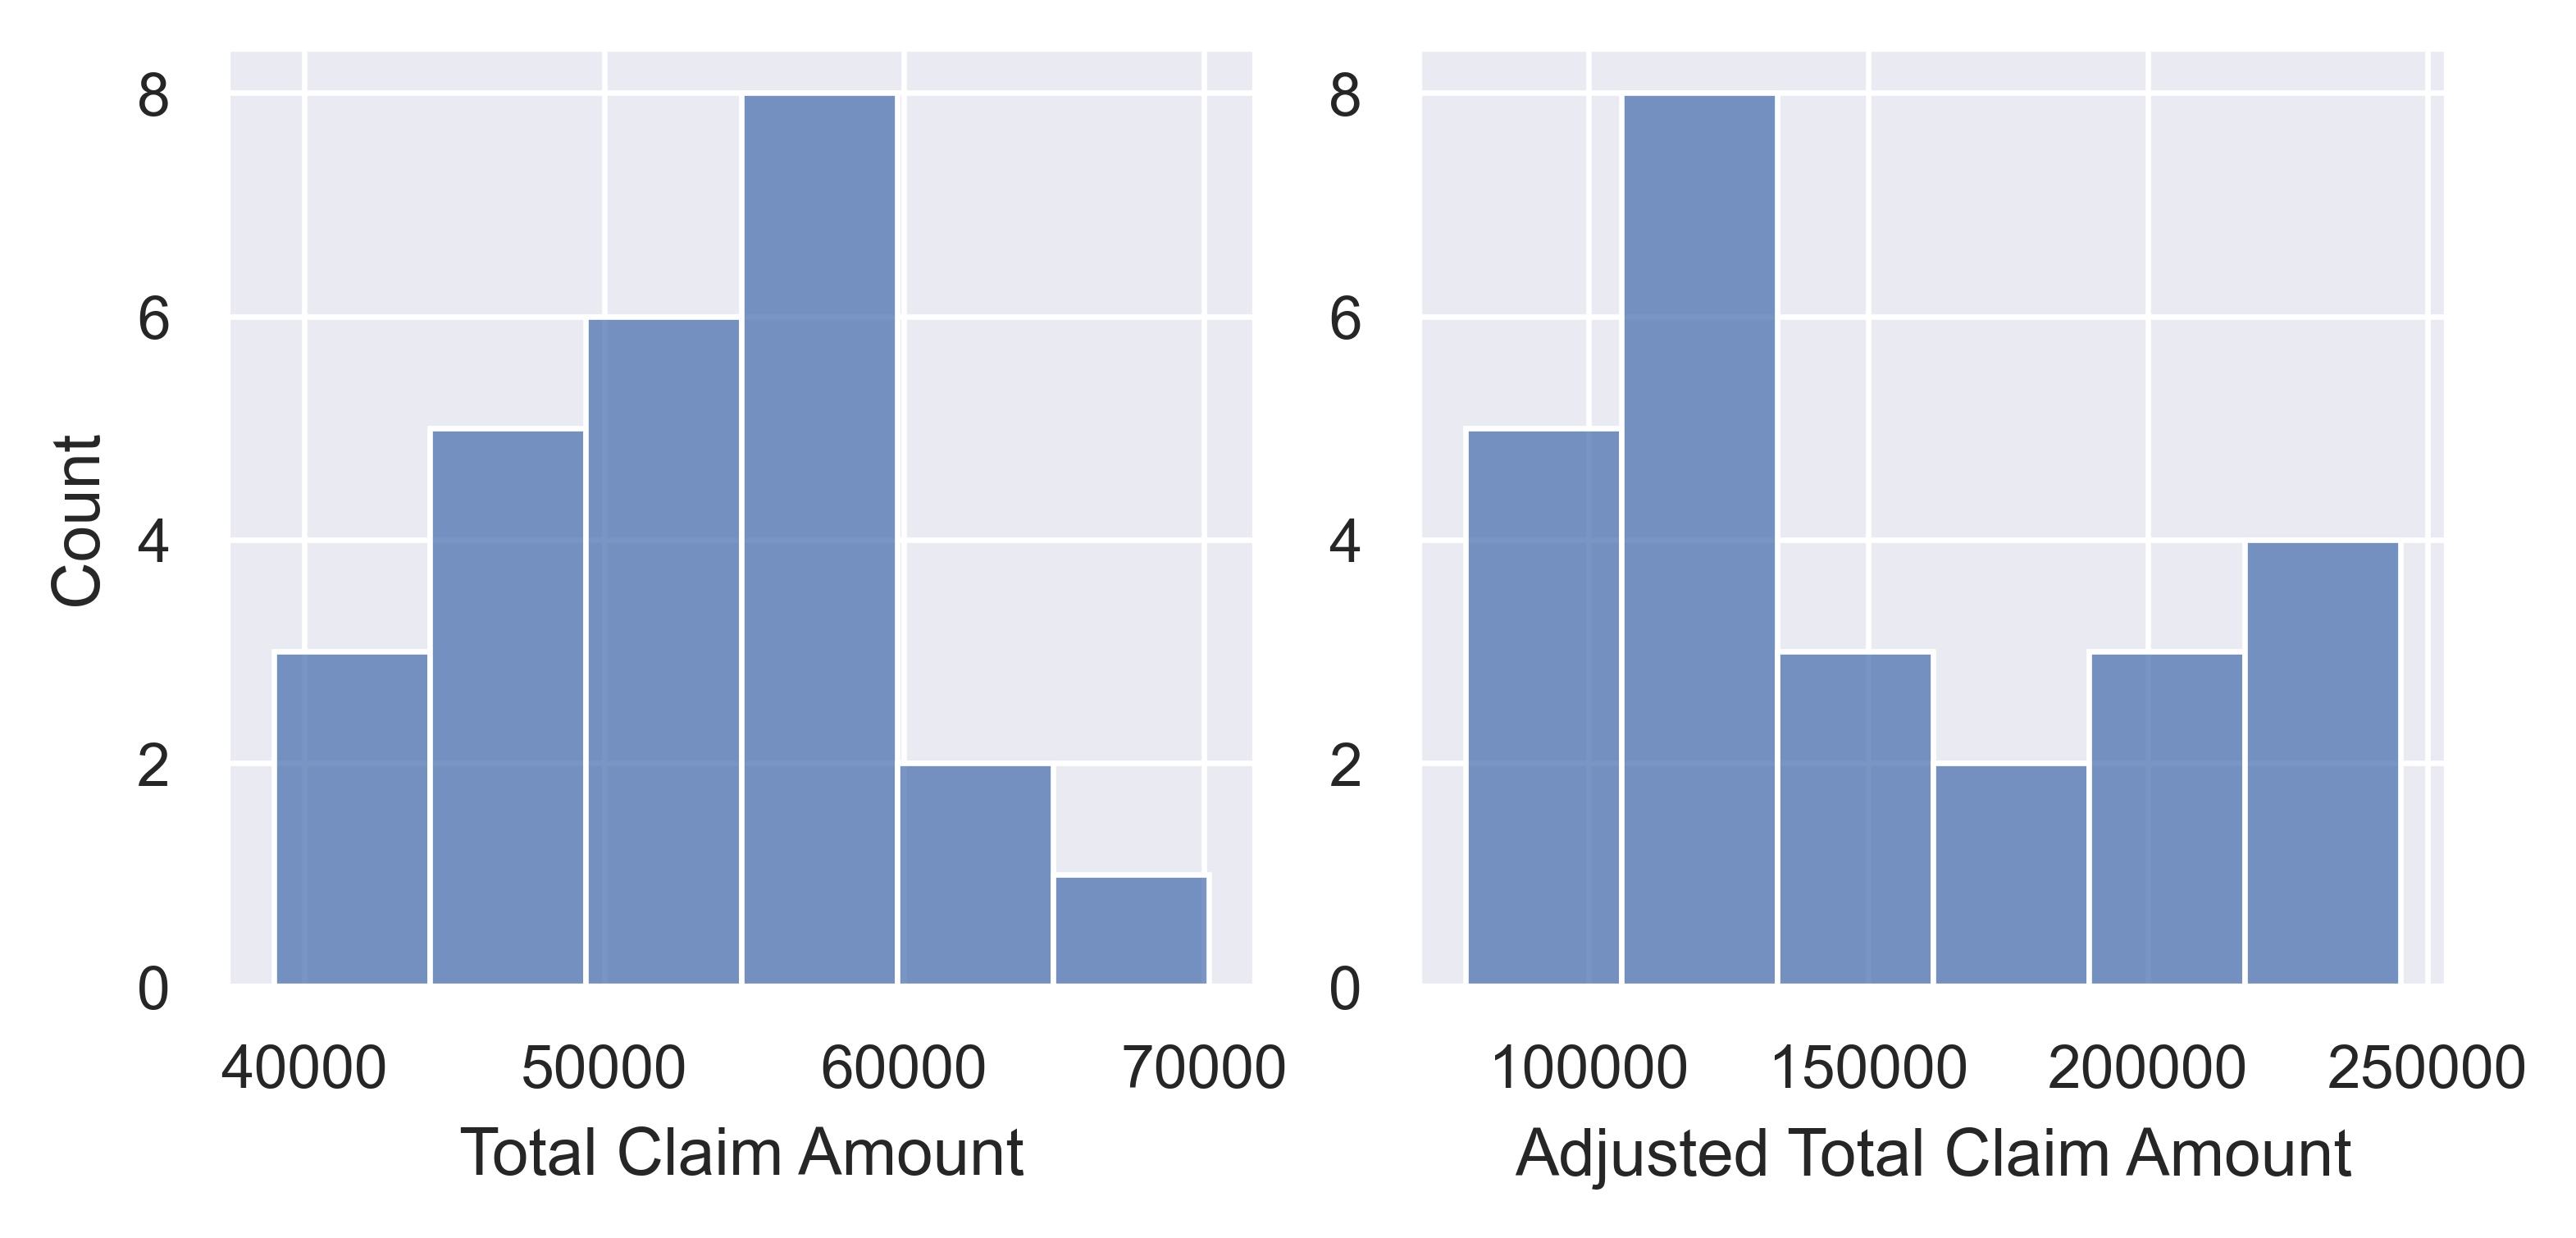

In [18]:
fig, axs = plt.subplots(1, 2, layout='constrained', figsize=[0.8*6.4, 0.5*4.8])

sns.histplot(df_agg, x='total_claim_amount', ax=axs[0])
axs[0].set(xlabel='Total Claim Amount')
sns.histplot(df_agg, x='adjusted_total_claim_amount', ax=axs[1])
axs[1].set(xlabel='Adjusted Total Claim Amount', ylabel='')

plt.show()

Dari hasil histogram kedua data, telihat data severitas klaim memliki distribusi yang lebih simetris sedangkan data severitas klaim yang disesuaikan terlihat lebih menceng kanan. Akan dicoba fitting beberapa distribusi dengan support non-negative yang dipaparkan oleh Tse (2009) yaitu distribusi gamma (dan exponential), Weibull, dan Pareto. Format parameter yang digunakan adalah (shape, loc, scale) dengan loc dipatok nol agar tidak mengubah support.

In [19]:
COLUMNS = ['total_claim_amount', 'adjusted_total_claim_amount',]

sev_dists = {
    'Gamma': [stats.gamma, {'floc': 0}],
    'Weibull': [stats.weibull_min, {'floc': 0}],
    'Pareto': [stats.pareto, {'floc': 0}],
}

# Fitting, listing parameters, and AIC
for col in COLUMNS:
    print(f"===== {col} =====")
    for name, [dist, kwargs] in sev_dists.items():
        params = dist.fit(df_agg[col], **kwargs)
        print(f"Parameter {name}: {params}")
        
        numargs = np.sum([param != 0 for param in params])
        nll = np.sum(-dist(*params).logpdf(df_agg[col]))
        aic = 2*numargs + 2*nll
        print(f"AIC {name}: {aic}")
        kstest_result = stats.kstest(df_agg[col], dist(*params).cdf)
        print(f"Kolmogorov-Smirnov p-val: {kstest_result.pvalue}\n")
    print()

===== total_claim_amount =====
Parameter Gamma: (52.25274068938471, 0, 1008.1991921166863)
AIC Gamma: 519.3247948186681
Kolmogorov-Smirnov p-val: 0.8387975833893065

Parameter Weibull: (7.836484673688875, 0, 55831.721083073295)
AIC Weibull: 520.7012091763271
Kolmogorov-Smirnov p-val: 0.8695175500410551

Parameter Pareto: (3.4346751954094623, 0, 38998.0)
AIC Pareto: 535.4245811640695
Kolmogorov-Smirnov p-val: 0.05713328950184782


===== adjusted_total_claim_amount =====
Parameter Gamma: (8.099964851917353, 0, 18203.231851190223)
AIC Gamma: 615.5890695115808
Kolmogorov-Smirnov p-val: 0.6536025953535398

Parameter Weibull: (3.012797530764354, 0, 165616.81118442764)
AIC Weibull: 617.7643015179353
Kolmogorov-Smirnov p-val: 0.5718617209039334

Parameter Pareto: (1.7418676977082501, 0, 77973.23111028403)
AIC Pareto: 618.1629671726503
Kolmogorov-Smirnov p-val: 0.12841582283335795




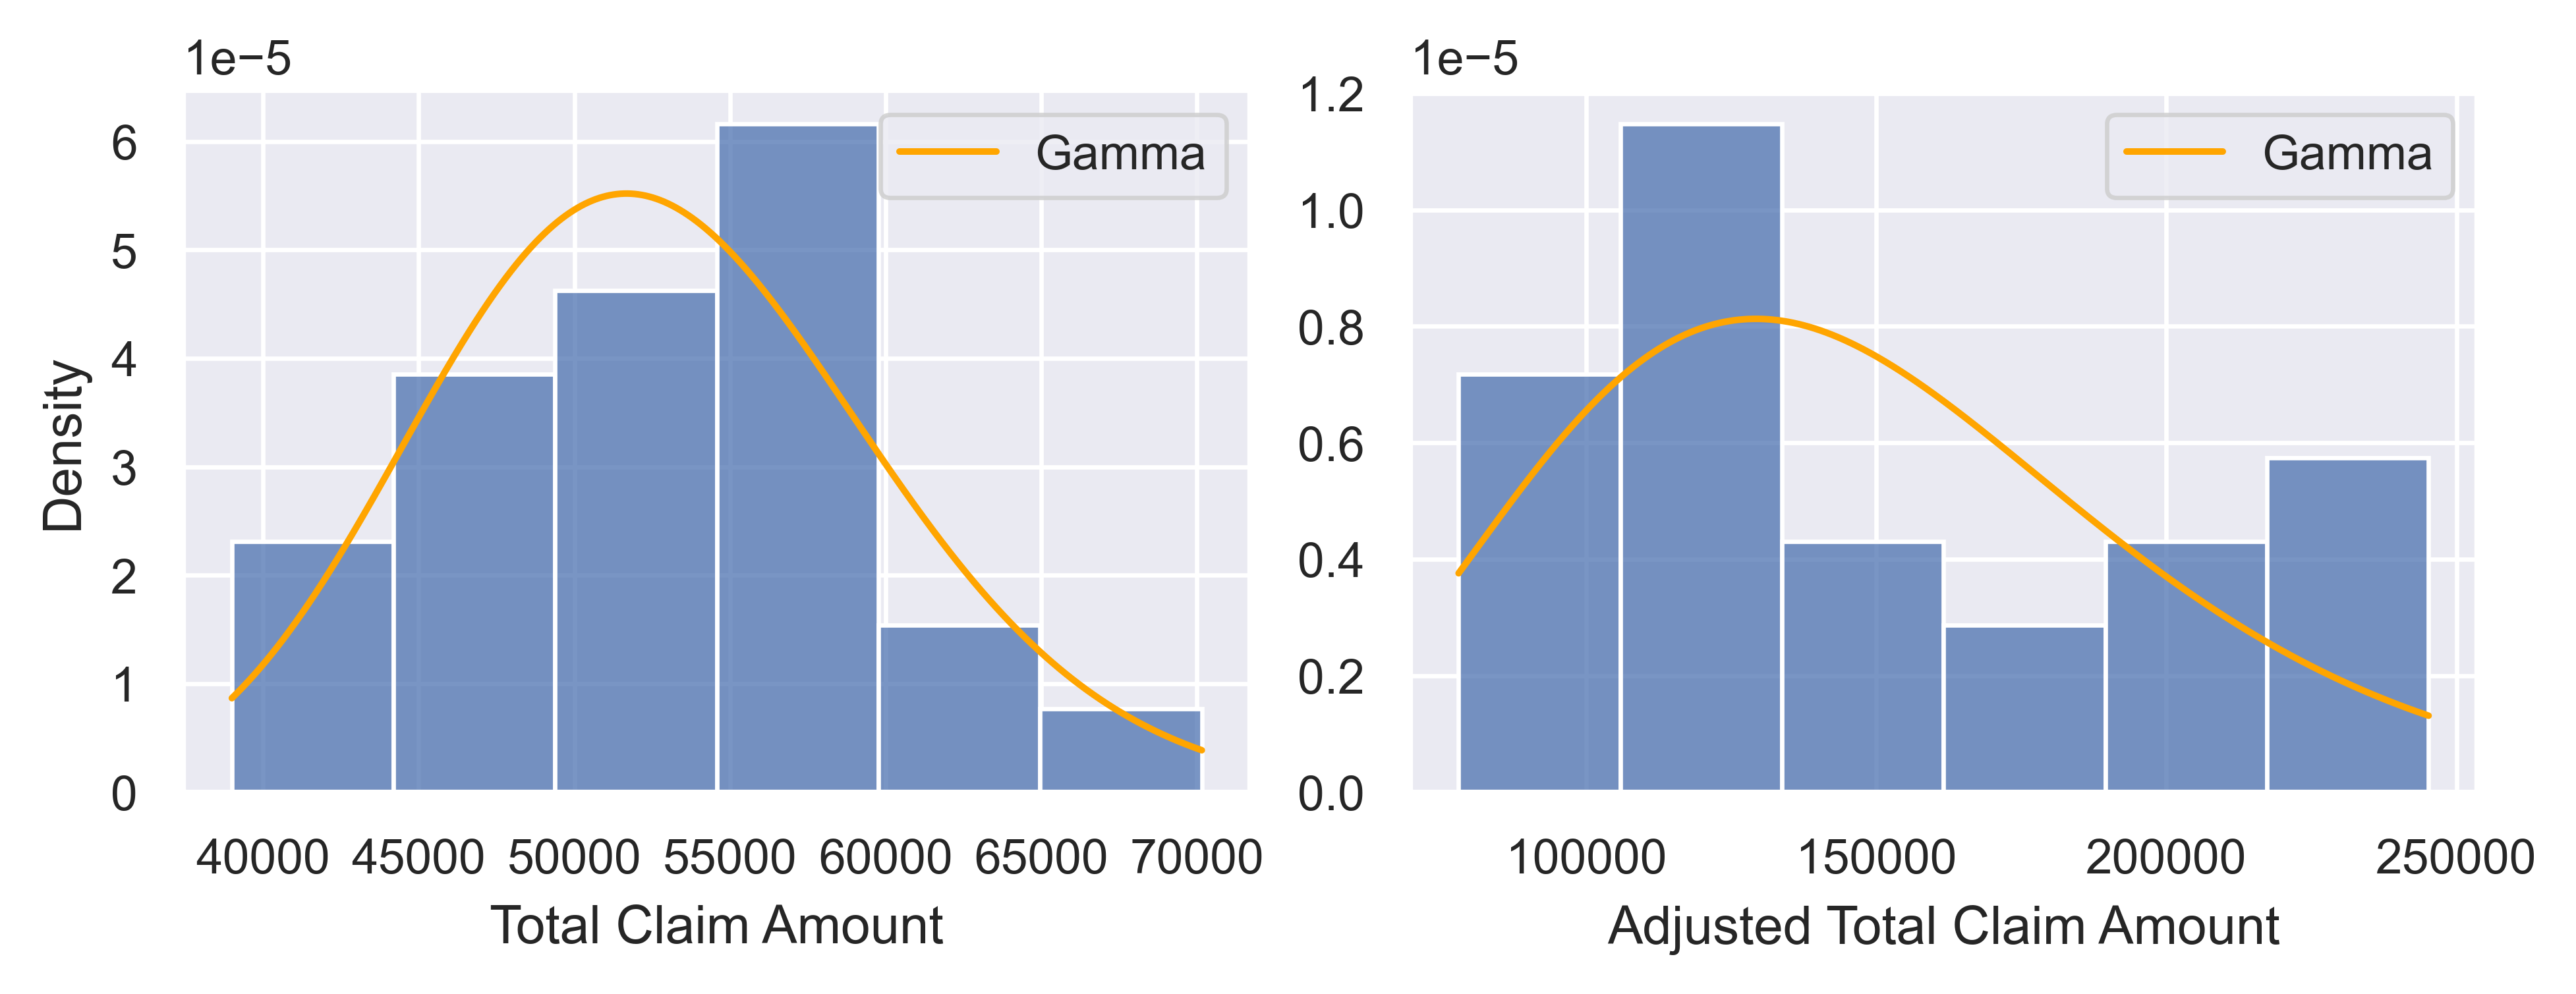

In [20]:
sev_dist = stats.gamma(*stats.gamma.fit(df_agg['total_claim_amount'],
                                        floc=0))
adjusted_sev_dist = stats.gamma(*stats.gamma.fit(df_agg['adjusted_total_claim_amount'],
                                                 floc=0))

fig, axs = plt.subplots(1, 2, layout='constrained', figsize=[1*6.4, 0.5*4.8])

# Severity
sns.histplot(df_agg, x='total_claim_amount', stat='density', ax=axs[0])
x = np.arange(df_agg['total_claim_amount'].min(),
              df_agg['total_claim_amount'].max())
axs[0].plot(x, sev_dist.pdf(x), label='Gamma', color='orange')
axs[0].set(xlabel='Total Claim Amount')
axs[0].legend()

# Adjusted Severity
sns.histplot(df_agg, x='adjusted_total_claim_amount', stat='density', ax=axs[1])
x = np.arange(df_agg['adjusted_total_claim_amount'].min(),
              df_agg['adjusted_total_claim_amount'].max())
axs[1].plot(x, adjusted_sev_dist.pdf(x), label='Gamma', color='orange')
axs[1].set(xlabel='Adjusted Total Claim Amount', ylabel='')
axs[1].legend()

plt.show()

Berdasarkan hasil fitting distribusi, dipilih distribusi dengan nilai AIC terkecil yaitu distribusi gamma untuk data severitas klaim (total claim amount) dengan parameter $(\alpha=52.25274068938471, \beta=1008.1991921166863)$. Untuk data severitas klaim yang disesuaikan (adjusted claim amount), dipilih distribusi dengan AIC terkecil yaitu distribusi gamma dengan parameter $(\alpha=8.099964851917353, \beta=18203.231851190223)$. 

##### (b) Hitung frekuensi klaim untuk setiap tahun kemudian tentukan model distribusi terbaik dari kelas $(a,b,0)$ yaitu Binomial, Poisson, dan Binomial Negatif untuk frekuensi klaim tahunan.

Akan dicari frekuensi klaim setiap tahun menggunakan plot histogram data.

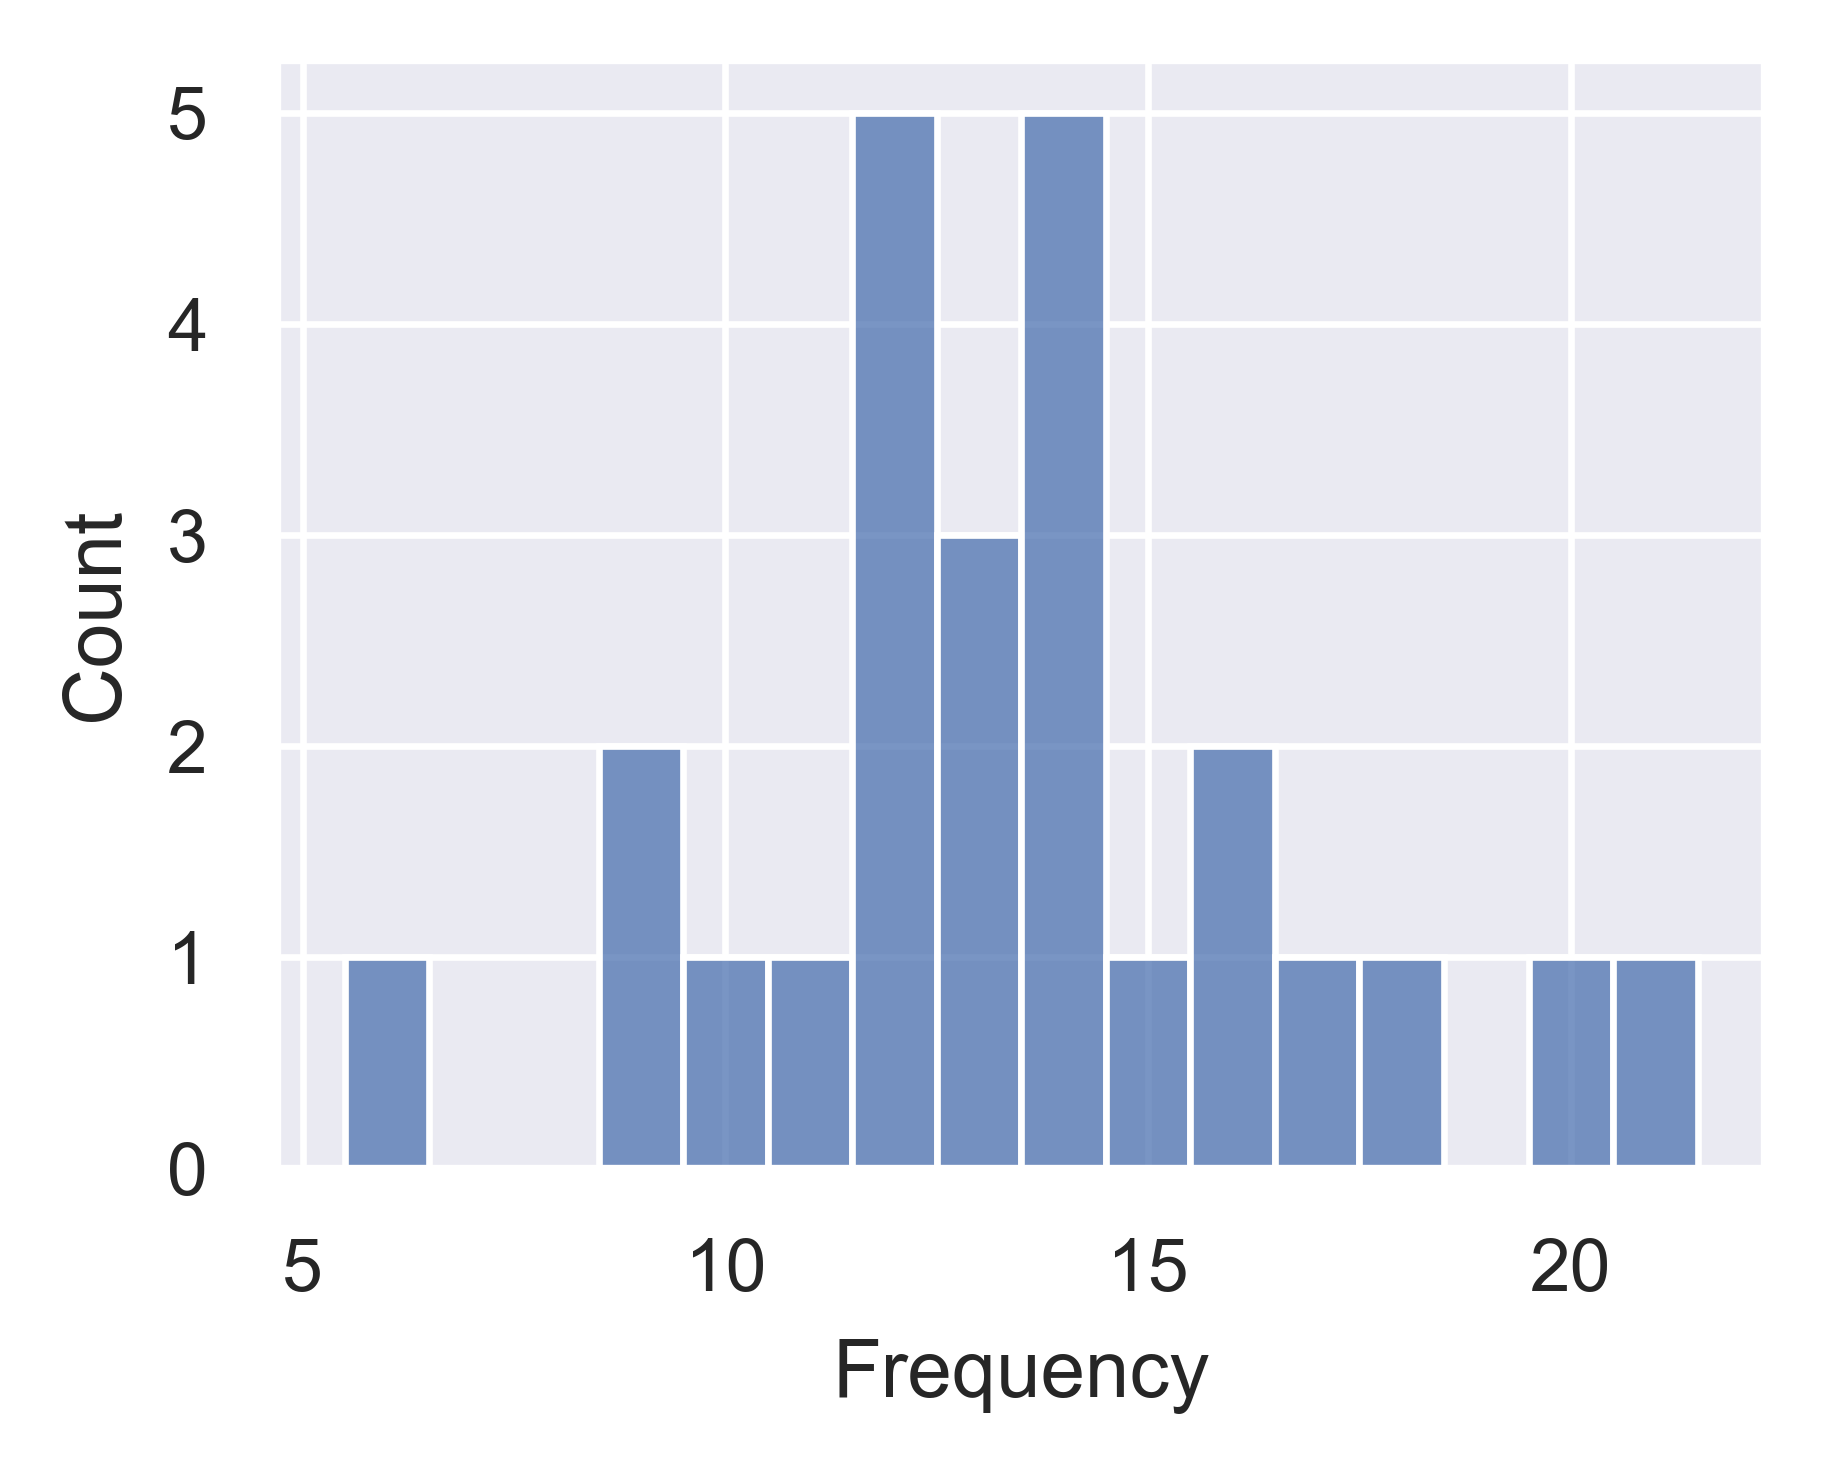

In [21]:
df_agg['frequency'] = df.groupby('loss_year')['loss_year'].agg('count')

sns.histplot(df_agg, x='frequency', discrete=True)
plt.gca().set(xlabel='Frequency')

plt.show()

In [22]:
np.random.seed(42)
freq_dists = {
    'Binomial': [stats.binom, {'bounds': {'n': (0,100000)}}],
    'Negative Binomial': [stats.nbinom, {'bounds': {'n': (0,100000)}}],
    'Poisson': [stats.poisson, {'bounds': {'mu': (0,100000)}}],
}

# Fitting, listing parameters, and AIC
for name, [dist, kwargs] in freq_dists.items():
    res = stats.fit(dist, df_agg['frequency'], **kwargs)
    print(f"Parameter {name}: {res.params}")
    nll = res.nllf()
    aic = 2*dist.numargs + 2*nll
    print(f"AIC {name}: {aic}")
    kstest_result = stats.kstest(df_agg['frequency'], dist(*res.params).cdf)
    print(f"Kolmogorov-Smirnov p-val: {kstest_result.pvalue}\n")

Parameter Binomial: FitParams(n=76.0, p=0.17736841621644883, loc=0.0)
AIC Binomial: 134.68733847962866
Kolmogorov-Smirnov p-val: 0.2569041033371896

Parameter Negative Binomial: FitParams(n=2134.0, p=0.993734699990394, loc=0.0)
AIC Negative Binomial: 135.2124567142029
Kolmogorov-Smirnov p-val: 0.17243471113617803

Parameter Poisson: FitParams(mu=13.480002761668317, loc=0.0)
AIC Poisson: 133.18153521548592
Kolmogorov-Smirnov p-val: 0.18501397951017318



Dari hasil fitting distribusi Binomial, Poisson, dan Binomial Negative, dipilih distribusi dengan nilai AIC terkecil yaitu distribusi Poisson dengan parameter $\lambda=13.480002761668317$.

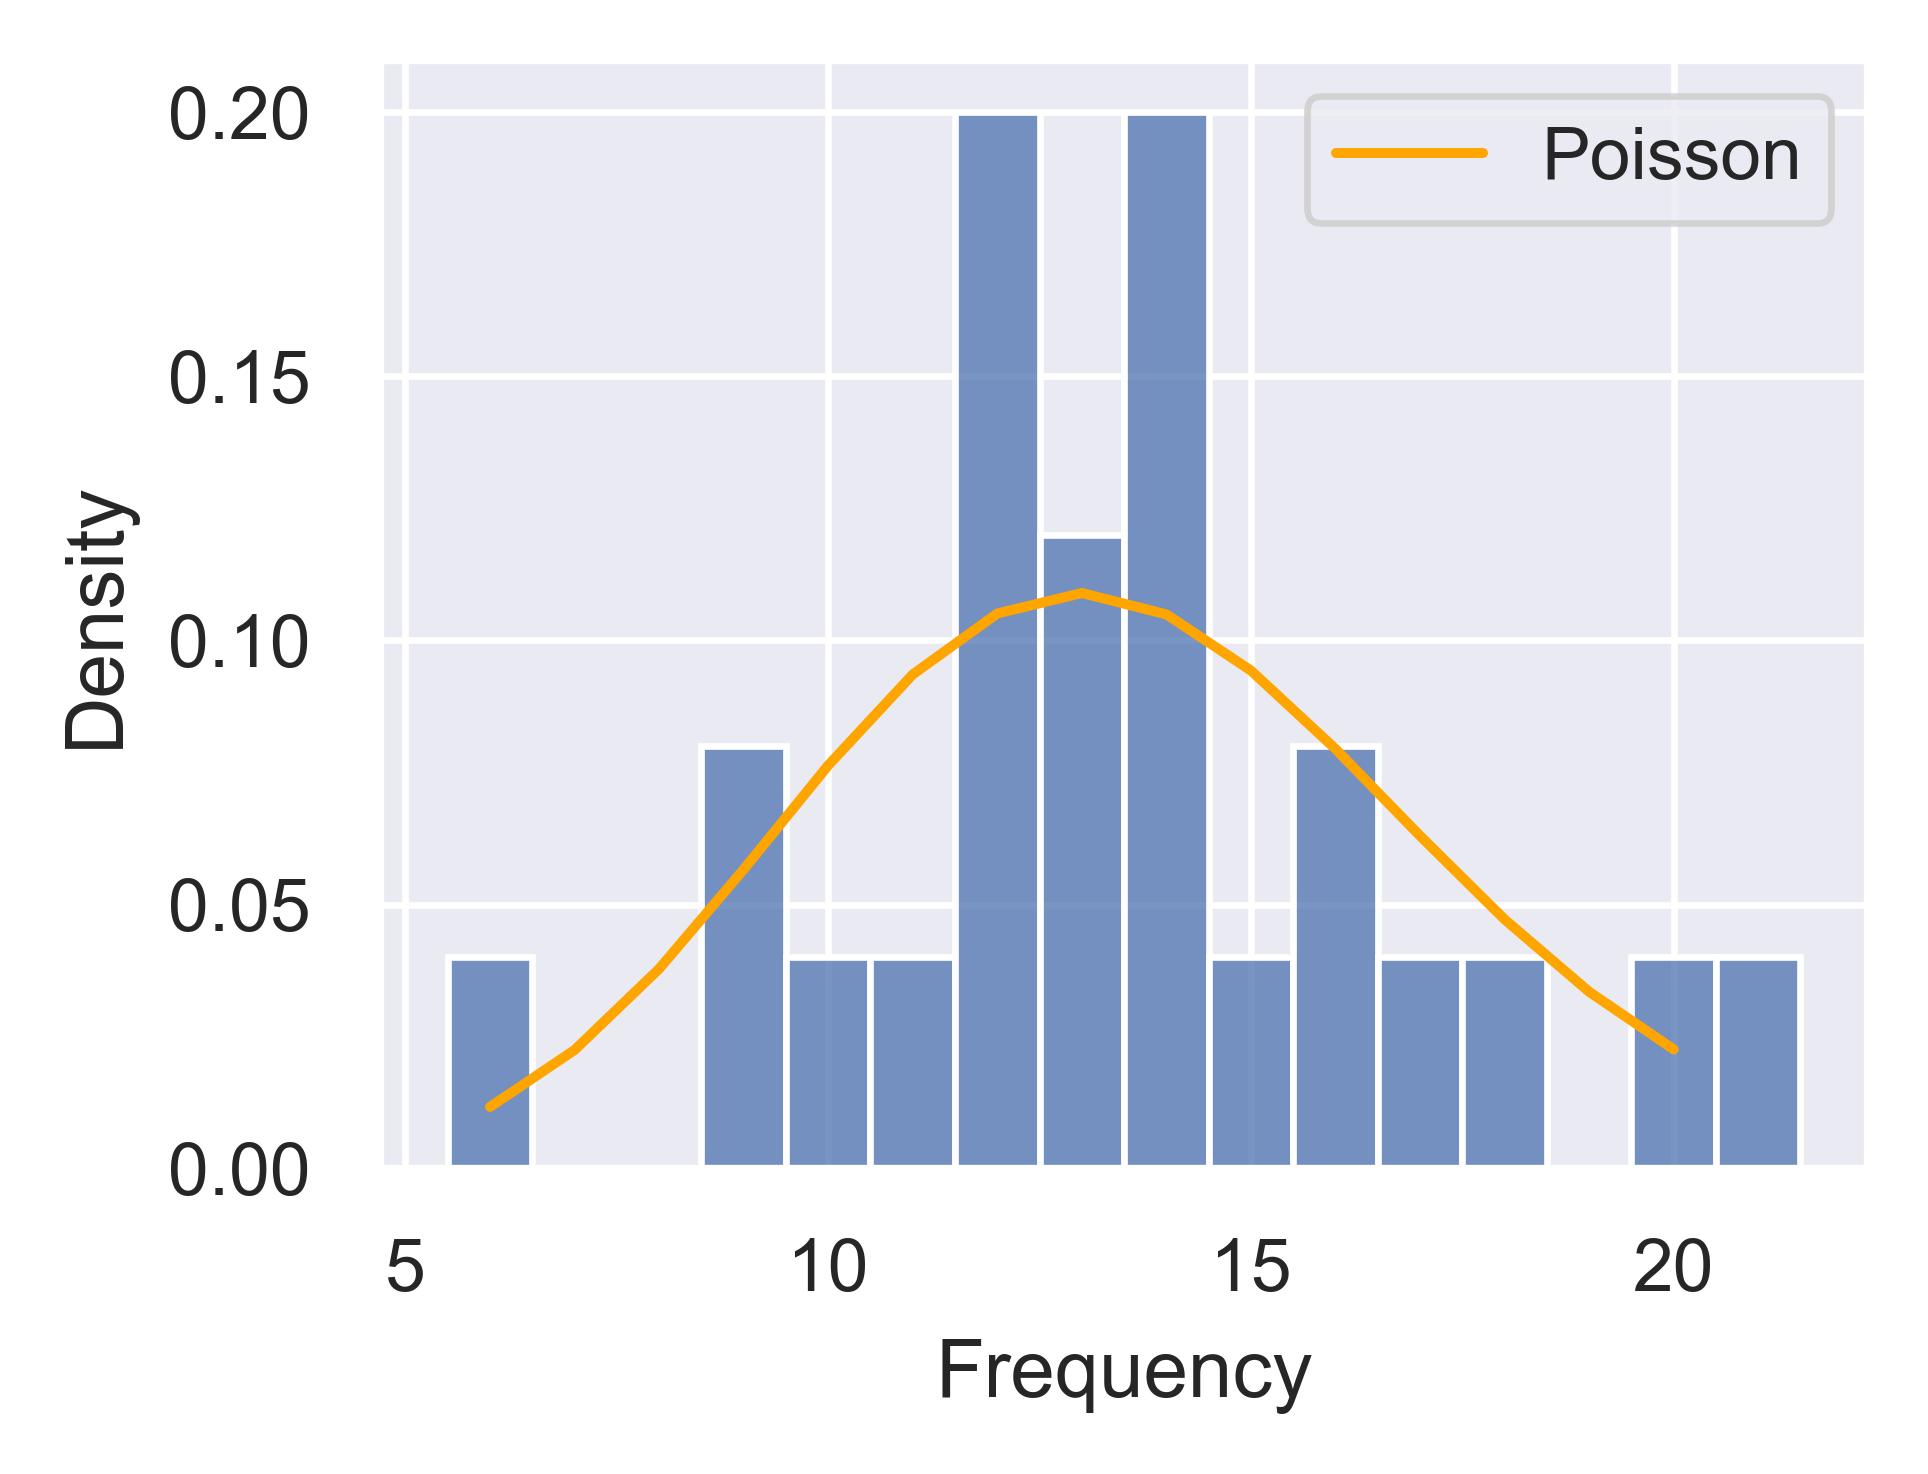

In [23]:
freq_dist = stats.poisson(
    *stats.fit(stats.poisson, df_agg['frequency'],bounds={'mu': (0,100000)})
    .params)

# Frequency
sns.histplot(df_agg, x='frequency', discrete=True, stat='density')
x = np.arange(df_agg['frequency'].min(), df_agg['frequency'].max())
plt.gca().plot(x, freq_dist.pmf(x), label='Poisson', color='orange')
plt.gca().set(xlabel='Frequency')
plt.gca().legend()

plt.show()

##### (c) Misalkan $S$ adalah model klaim agregat yang didefinisikan sebagai $S=N\bar{X}$. Bila $X$ peubeh acak severitas yang sudah disesuaikan dan $N$ frekuensi klaim tahunan saling bebas, evaluasi fungsi peluang dari $S$ kemudian hitung momen pusat kedua dari $S$.

$N$ berdistribusi Poisson dengan parameter $\lambda=13.48$ dan $\bar{X}$ berdistribusi Gamma dengan parameter $(\alpha=8.10, \beta=18203.23)$. Misal $f_{N}(n)$ fungsi massa peluang dari $N$ dan $f_{\bar{X}}(\bar{x})$ fungsi kepadatan peluang dari $\bar{X}$. Fungsi peluang $S$ didefinisikan sebagai berikut:

Untuk $s=0$,

\begin{align*}
    f_{S}(0)=f_{N}(0)\int_{0}^{\infty}f_{\bar{X}}(\bar{x})d\bar{x}=f_{N}(0)
\end{align*}

sehingga $S$ memiliki massa peluang di $0$.

Untuk $s \gt 0$,

\begin{align*}
    f_{S}(s)=\sum_{n=1}^{\infty}{f_{N}(n)f_{\bar{X}} \left( \frac{s}{n} \right) }
\end{align*}
karena nilai $s$ bisa "dicapai" dengan nilai $n$ yang berbeda-beda sedemikian sehingga realisasi dari $\bar{X}=\frac{S}{N}$.

Untuk $N \sim Poisson(\lambda=13.48)$ dan $\bar{X} \sim Gamma(\alpha=8.10, \beta=18203.23)$, didapat fungsi peluang dari $S$ sebagai berikut:

\begin{align*}
    f_{S}(s)&=
    \begin{cases}
        \exp{(-\lambda)}, &s=0 \\
        \sum_{n=1}^{\infty}{[\exp{(-\lambda)}\frac{\lambda^{n}}{n!}][\frac{1}{\Gamma(\alpha)\beta^{\alpha}}}(\frac{s}{n})^{\alpha-1}\exp{(-\frac{\frac{s}{n}}{\beta})}], &s>0 
    \end{cases} \\
    &=
    \begin{cases}
        \exp{(-13.48)}, &s=0 \\
        \sum_{n=1}^{\infty}
            [\exp{(-13.48)}\frac{13.48^{n}}{n!}]
            [\frac{1}{\Gamma(8.10)18203.23^{8.10}}(\frac{s}{n})^{8.10-1}\exp{(-\frac{\frac{s}{n}}{18203.23})]
        }, &s>0 
    \end{cases} \\
    &=
    \begin{cases}
        \exp{(-13.48)}, &s=0 \\
        \frac{\exp{(-13.48)s^{7.10}}}{\Gamma(8.10)18203.23^{8.10}}\sum_{n=1}^{\infty}
            [\frac{13.48^{n}}{n!}]
            [(\frac{1}{n})^{7.10}\exp{(-\frac{s}{18203.23n})]
        }, &s>0 
    \end{cases}
\end{align*}

Momen pusat kedua (variansi) dari $S$ diberikan oleh:

\begin{align*}
    Var(S) &= Var(N\bar{X}) = E[(N\bar{X})^{2}]-E[N\bar{X}]^{2}.
\end{align*}
Karena $N$ dan $\bar{X}$ saling bebas, berlaku
\begin{align*}
    Var(S)= E[N^{2}\bar{X}^{2}]-E[N\bar{X}]^{2} = E[N^{2}]E[\bar{X}^{2}]-E[N]^{2}E[\bar{X}]^{2}.
\end{align*}

Dengan
\begin{align*}
E[N] &= 13.4799992
386888, E[N^2] = 195.190378713741,\\
E[X] &= 147{,}445.538185943, E[X^2] = 24{,}424{,}172{,}047.9646,
\end{align*}
diperoleh
\begin{align*}
Var(S)&=(195.1903787)(24{,}424{,}172{,}047.9646)-(13.47999924)^2(147{,}445.538185943)^2 \\
&=816{,}945{,}811{,}073.7534.
\end{align*}

##### (d) Pada tingkat kepercayaan 90%, selidiki kredibilitas untuk $S$.

Peluang realisasi $S$ berada dalam sembarang persentase jarak dari rata-rata $S$ diberikan oleh $Pr\left( \left| \frac{S-\mu_S}{\sigma_S} \right| \leq k \frac{\mu_S}{\sigma_S} \right)$. Jika $N$ diasumsikan besar, aproksimasi normal berlaku sehingga $Pr\left( \left| \frac{S-\mu_S}{\sigma_S} \right| \leq k \frac{\mu_S}{\sigma_S} \right) \approx 2\Phi\left( k \frac{\mu_S}{\sigma_S} \right)-1$, dengan $\Phi$ fungsi distribusi normal. Agar kredibilitas penuh, nilai peluang tersebut harus lebih besar dari tingkat kepercayaan yang diinginkan $\alpha$, yaitu $2\Phi\left( k \frac{\mu_S}{\sigma_S} \right)-1 \geq \alpha$. Pertidaksamaan tersebut dipenuhi oleh $k \frac{\mu_S}{\sigma_S} \geq z_{1-\frac{\alpha}{2}}$.

Untuk $1-\alpha=0.90$, berlaku $k \frac{\mu_S}{\sigma_S} \geq z_{0.95}$ sehingga $k \geq z_{0.95} \frac{\sigma_S}{\mu_S}$. Dari bagian sebelumnya diperoleh:
\begin{align*}
  \mu_s &= \mu_{N}\mu_{\bar{X}} = (13.4799992386888)(147{,}445.538185943) = 1{,}987{,}565.7424945885 \\
  \sigma_S &= \sqrt{Var(S)} = \sqrt{816{,}945{,}811{,}073.7534} = 903{,}850.5468680945.
\end{align*}

Maka, kredibilitas penuh akan dicapai apabila
\begin{align*}
  k &\geq z_{0.95} \frac{\sigma_S}{\mu_S}=(1.6448536269514722)\frac{903{,}850.5468680945}{1{,}987{,}565.7424945885} \\
  &= 0.7480013457930208
\end{align*}
dan parsial apabila $0 \leq k < 0.7480013457930208$.

##### (e) Hitung faktor kredibilitas B&uuml;hlmann untuk $X$ dan $N$.

Misal $Z_{X}$ dan $Z_{N}$ adalah faktor kredibilitas B&uuml;hlmann untuk $X$ dan $N$. Nilai $Z$ sama dengan $\frac{n}{n+k}$. Untuk $Z_{N}$, $n$ adalah jumlah periode dari klaim yang diagregatkan. Untuk $Z_{X}$, $n$ adalah ukuran sampel yang diagregatkan. Nilai $k$ didapat dari rasio $\frac{EPV}{VHM}$.

Untuk mendapat nilai $EPV$ dan $VHM$, profil risiko dibedakan berdasarkan tahun terjadinya klaim. Untuk $X$, $EPV_{X}=E[Var(X \mid \Theta)]$ ditaksir oleh rata-rata dari variansi besar klaim tiap tahun dan $VHM_{X}=Var(E[X \mid \Theta])$ ditaksir oleh variansi dari rata-rata klaim tiap tahun.

In [24]:
df_buhlmann = (
    df[['loss_year', 'adjusted_total_claim_amount']]
    .groupby('loss_year')
    .agg(['mean', 'var', 'count'])
)

expected_process_variance = df_buhlmann[('adjusted_total_claim_amount', 'var')].mean()
variance_hypothetical_mean = df_buhlmann[('adjusted_total_claim_amount', 'mean')].var()

k = expected_process_variance / variance_hypothetical_mean
n = len(df_buhlmann)

print(f"Faktor kredibilitas B\N{Latin Small Letter U with Diaeresis}hlmann X: {n / (n+k)}")

Faktor kredibilitas Bühlmann X: 0.9208310858176184



Untuk $N$, $EPV_{N}=E[Var(N \mid \Theta)]$ dan $VHM_{N}=Var(E[N \mid \Theta])$. Khusus untuk frekuensi klaim, $Var(N \mid \Theta) = E(N \mid \Theta)$ karena frekuensi klaim diasumsikan berdistribusi Poisson. Akibatnya, $EPV_{N}=E[N]$ ditaksir oleh rata-rata banyaknya klaim tiap tahun. Sementara itu, $VHM_{N}=Var(E[N \mid \Theta])$ ditaksir oleh variansi dari frekuensi klaim tiap tahun.

In [25]:
expected_process_variance = (df_buhlmann[('adjusted_total_claim_amount', 'count')]
                             .mean())
variance_hypothetical_mean = (df_buhlmann[('adjusted_total_claim_amount', 'count')]
                              .var())

k = expected_process_variance / variance_hypothetical_mean
n = len(df_buhlmann)
Z = n / (n + k)

print(f"Faktor kredibilitas B\N{Latin Small Letter U with Diaeresis}hlmann N: {Z}")

Faktor kredibilitas Bühlmann N: 0.9549384917097521


## Referensi

Tse, Yiu-Kuen. (2009). *Nonlife Actuarial Models Theory, Methods and Evaluation*. New York: Cambridge University Press.

Hogg, R., McKean, J., Craig, A. (2019) Introduction to Mathematical Statistics. 8th Edition. Boston: Pearson.

Taboga, Marco (2021). "Maximum likelihood - Numerical optimization algorithm", Lectures on probability theory and mathematical statistics. Kindle Direct Publishing. Online appendix. https://www.statlect.com/fundamentals-of-statistics/maximum-likelihood-algorithm.

Larson R. C. & Odoni A. R. (1981). *Urban operations research*. Prentice-Hall. https://web.mit.edu/urban_or_book/www/book/index.html.

J. A. Nelder, R. Mead, A Simplex Method for Function Minimization, The Computer Journal, Volume 7, Issue 4, January 1965, Pages 308–313, https://doi.org/10.1093/comjnl/7.4.308.

Noriszura, Ismail & Jaber, Jamil & Mohd Ramli, Siti. (2017). Credit risk assessment using survival analysis for progressive right-censored data: a case study in Jordan. Journal of Internet Banking and Commerce. 22. 1-18. Diambil kembali dari https://www.researchgate.net/publication/316841764_Credit_risk_assessment_using_survival_analysis_for_progressive_right-censored_data_a_case_study_in_Jordan.

Borgan, Ø. (2005). Nelson–Aalen Estimator. In Encyclopedia of Biostatistics (eds P. Armitage and T. Colton). https://doi.org/10.1002/0470011815.b2a11054.

Klugman, Stuart A., Panjer, Harry H., Willmot, Gordon E. (2019). *Loss Models: From Data To Decisions*. 5th Edition. Hoboken: John Wiley & Sons, Inc.

de Jong, P., Heller, G. (2008). *Generalized Linear Models for Insurance Data*. Cambridge: Cambridge University Press.